In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Task 1 : Select what features you'll use.

In [120]:
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','total_stock_value','exercised_stock_options',
                'bonus','salary','long_term_incentive','shared_receipt_with_poi','deferred_income',
                'from_poi_to_this_person','poi_message_percentage','restricted_stock','total_payments']

# You will need to use more features
# 认为POI都是收入水平很高，且需要花钱的人，因此加入税金与可行驶的股票期权

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)


## Task 1.1 : Explore dataset.

In [60]:
print 'Originally, number of data points is {0}'.format(len(data_dict))

Originally, number of data points is 146


In [12]:
poi_list = {name:info for name,info in data_dict.iteritems() if info['poi']==1}
print 'POI number is {0}'.format(len(poi_list))
print 'Not POI number is {0}'.format(len({name:info for name,info in data_dict.iteritems() if info['poi']==0}))

POI number is 18
Not POI number is 128


In [13]:
ALL_FEATURES = [k for k in data_dict.items()[0][1].keys() if k!='email_address' and k!='poi']

In [14]:
print ALL_FEATURES

['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'from_poi_to_this_person']


In [15]:
print 'Features number is {0}'.format(len(features_list)-1)
print 
print 
for feature in ALL_FEATURES:
    feature_nan_list = [info[feature] for name, info in data_dict.iteritems() if feature in info.keys() and info[feature] == 'NaN']
    print "NaN number of feature : {0} : {1}".format(feature, len(feature_nan_list),)
print 

print 'Total POI number is {0}'.format(len(poi_list))
for feature in ALL_FEATURES:
    poi_list_with_feature_nan = [info[feature] for poi, info in poi_list.iteritems() if feature in info.keys() and  info[feature] == 'NaN']
    print "poi with NaN {0} value: {1}".format(feature, len(poi_list_with_feature_nan))

Features number is 11


NaN number of feature : salary : 51
NaN number of feature : to_messages : 60
NaN number of feature : deferral_payments : 107
NaN number of feature : total_payments : 21
NaN number of feature : exercised_stock_options : 44
NaN number of feature : bonus : 64
NaN number of feature : restricted_stock : 36
NaN number of feature : shared_receipt_with_poi : 60
NaN number of feature : restricted_stock_deferred : 128
NaN number of feature : total_stock_value : 20
NaN number of feature : expenses : 51
NaN number of feature : loan_advances : 142
NaN number of feature : from_messages : 60
NaN number of feature : other : 53
NaN number of feature : from_this_person_to_poi : 60
NaN number of feature : director_fees : 129
NaN number of feature : deferred_income : 97
NaN number of feature : long_term_incentive : 80
NaN number of feature : from_poi_to_this_person : 60

Total POI number is 18
poi with NaN salary value: 1
poi with NaN to_messages value: 4
poi with NaN deferral_paym

In [16]:
nan_list = []
for name, features in data_dict.iteritems():
    nan_count = 0
    for feature, value in features.iteritems():
        if value=='NaN':
            nan_count += 1
    nan_list.append({'name':name,'cnt':nan_count})

    
nan_list.sort(key=lambda x:x['cnt'], reverse=True)
for nan in nan_list:
    print 'NaN number of {0:<25} is :   {1:>2} / {2}'.format(nan['name'], nan['cnt'], len(ALL_FEATURES)+2)

NaN number of LOCKHART EUGENE E         is :   20 / 21
NaN number of WHALEY DAVID A            is :   18 / 21
NaN number of WROBEL BRUCE              is :   18 / 21
NaN number of THE TRAVEL AGENCY IN THE PARK is :   18 / 21
NaN number of GRAMM WENDY L             is :   18 / 21
NaN number of WODRASKA JOHN             is :   17 / 21
NaN number of CLINE KENNETH W           is :   17 / 21
NaN number of WAKEHAM JOHN              is :   17 / 21
NaN number of SCRIMSHAW MATTHEW         is :   17 / 21
NaN number of GILLIS JOHN               is :   17 / 21
NaN number of SAVAGE FRANK              is :   17 / 21
NaN number of LOWRY CHARLES P           is :   16 / 21
NaN number of CHAN RONNIE               is :   16 / 21
NaN number of URQUHART JOHN A           is :   16 / 21
NaN number of MENDELSOHN JOHN           is :   16 / 21
NaN number of MEYER JEROME J            is :   16 / 21
NaN number of GATHMANN WILLIAM D        is :   16 / 21
NaN number of PEREIRA PAULO V. FERRAZ   is :   16 / 21
NaN nu

LOCKHART EUGENE E, THE TRAVEL AGENCY IN THE PARK, TOTAL

# Task 2: Remove outliers

In [121]:
### Task 2: Remove outliers
data_dict.pop( 'TOTAL', 0 ) # TOTAL 存储的是所有人的总和，因此为异常值
data_dict.pop( 'LOCKHART EUGENE E', 0 )
data_dict.pop( 'THE TRAVEL AGENCY IN THE PARK', 0 )

print 'After removing outliers, new number of data point is {0}'.format(len(data_dict))

After removing outliers, new number of data point is 143


# Task 3: Create new feature(s)

In [123]:
# 先去除NaN数量过多的一些特征
features_list_bak = ['poi','salary', 'to_messages',  'total_payments', 'exercised_stock_options', 'bonus', 
                 'restricted_stock', 'shared_receipt_with_poi', 'total_stock_value', 'expenses', 
                 'from_messages', 'other', 'from_this_person_to_poi', 'deferred_income', 'long_term_incentive', 
                 'from_poi_to_this_person', 'poi_message_percentage']

In [124]:
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

for k,v in my_dataset.iteritems():
    to_messages = v['to_messages'] 
    from_poi_to_this_person = v['from_poi_to_this_person']
    from_messages = v['from_messages']
    from_this_person_to_poi = v['from_this_person_to_poi']

    if to_messages == 'NaN' or from_poi_to_this_person == 'NaN' or from_messages == 'NaN' or from_this_person_to_poi == 'NaN':
        v['poi_message_percentage'] = 'NaN'
    else:
        poi_message_percentage = 1.0*(from_poi_to_this_person+from_this_person_to_poi/(from_messages+to_messages))
        v['poi_message_percentage'] = poi_message_percentage
    
    ### Deal with deferred_income
    if v['deferred_income']=='NaN':
        v['deferred_income'] = 'NaN'
    elif v['deferred_income']<0:
        v['deferred_income'] = abs(v['deferred_income'])
    else:
        pass
    
    ### Deal with restricted_stock : 输入错误，应该是restricted_stock_deferred为负数
    if k=='BHATNAGAR SANJAY':
        v['restricted_stock'] = abs(v['restricted_stock'])

    if k=='BELFER ROBERT':
        v['total_stock_value'] = abs(v['total_stock_value'])
    #print poi_message_percentage

In [125]:
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list_bak, sort_keys = True)
labels, features = targetFeatureSplit(data)

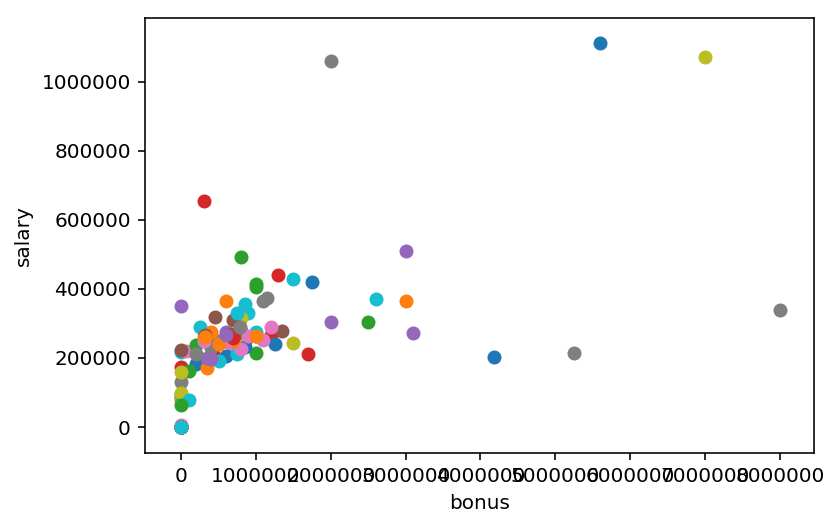

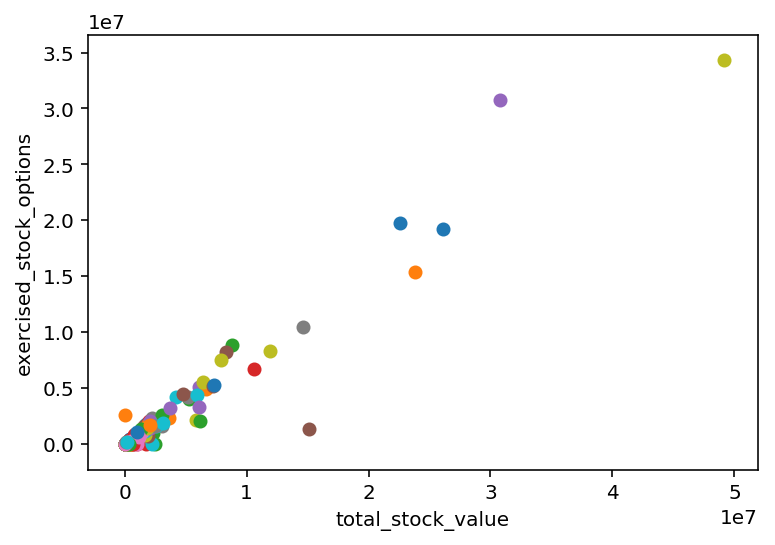

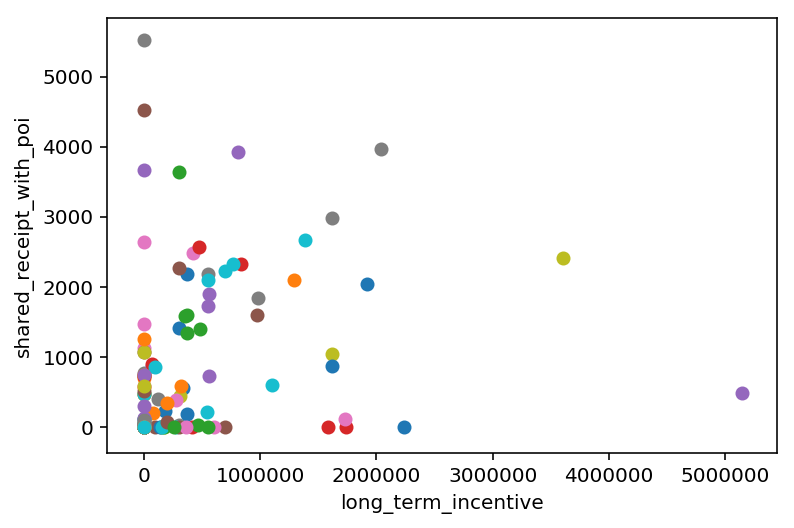

In [40]:
def draw_2features_scatter(X_id, Y_id):
    import matplotlib.pyplot as plt
    for point in features:
        X = point[X_id]
        Y = point[Y_id]
        plt.scatter( X, Y )
    plt.xlabel(features_list[1+X_id])
    plt.ylabel(features_list[1+Y_id])
    plt.show()

draw_2features_scatter(X_id=0, Y_id=1)
draw_2features_scatter(X_id=2, Y_id=3)
draw_2features_scatter(X_id=4, Y_id=5)

# Task 4: Try a varity of classifiers

In [126]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

clf_NB = GaussianNB()
param_NB = dict(reduce_dim__n_components=[2,3,4])

clf_DT = DecisionTreeClassifier()
param_DT = dict(reduce_dim__n_components=[2,3,4], clf__min_samples_split=[20, 40, 80, 100])

clf_SVM = SVC()
param_SVM = dict(reduce_dim__n_components=[2,3,4], clf__kernel=['linear', 'rbf', 'sigmoid'], clf__C=[1,10,100,1000,10000])

In [127]:
# Auto param selection.
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler   

def param_selection(clf, param_grid, X, Y):
    estimators = [('scaler', MinMaxScaler()), ('reduce_dim', PCA()), ('clf', clf)]
    model = Pipeline(estimators)
    
    selection = GridSearchCV(model, param_grid=param_grid, scoring='recall', cv=5)
    selection.fit(X, Y)
    print "Best params:"
    print selection.best_params_
    print
    print "Best estimator steps:"
    print selection.best_estimator_.named_steps


# Task 5: Tune your classifier

In [128]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
#from sklearn.cross_validation import train_test_split
#features_train, features_test, labels_train, labels_test = \
#   train_test_split(features, labels, test_size=0.1, random_state=42) 
features_train = []
features_test  = []
labels_train   = []
labels_test    = []
from sklearn.cross_validation import KFold
kf = KFold(len(labels), 10, shuffle=True, random_state=42) #数据数量，k折交叉验证, 打乱(随机化)
for train_indices,  test_indices in kf:
    features_train = [features[ii] for ii in train_indices]
    features_test = [features[ii] for ii in test_indices]
    labels_train = [labels[ii] for ii in train_indices]
    labels_test = [labels[ii] for ii in test_indices]


# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2
feature_selection = SelectKBest(f_classif, k=11)

features_train_new = MinMaxScaler().fit_transform(features_train)
feature_selection.fit(features_train_new, labels_train)


selection_result = zip(feature_selection.scores_, features_list_bak[1:])
selection_result.sort(key=lambda x:x[0], reverse=True) 

for s in selection_result:
    print s

print
print feature_selection.get_params()

(21.025541007879092, 'total_stock_value')
(20.86041938003126, 'exercised_stock_options')
(12.726584754617214, 'bonus')
(11.392957451345879, 'deferred_income')
(10.782364795127885, 'salary')
(9.6717798500472689, 'expenses')
(7.68194874810795, 'total_payments')
(6.9730938153919544, 'restricted_stock')
(6.2920659115092912, 'long_term_incentive')
(6.0952665591715922, 'shared_receipt_with_poi')
(4.6849337562111231, 'other')
(2.4657311759274636, 'from_poi_to_this_person')
(2.4657311759274636, 'poi_message_percentage')
(2.1107422153306241, 'from_this_person_to_poi')
(1.3212555075117851, 'to_messages')
(0.16726274531112353, 'from_messages')

{'k': 11, 'score_func': <function f_classif at 0x0000000014291F28>}


In [129]:
features_list = ['poi','total_stock_value','exercised_stock_options',
                'bonus','deferred_income','salary','expenses','total_payments',
                 'restricted_stock','long_term_incentive','shared_receipt_with_poi','other',
                 'from_poi_to_this_person','poi_message_percentage']
#features_list = ['poi','total_stock_value','exercised_stock_options',
#                'bonus','salary','long_term_incentive','shared_receipt_with_poi','deferred_income',
#                'from_poi_to_this_person','poi_message_percentage','restricted_stock','total_payments']
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

features_train = []
features_test  = []
labels_train   = []
labels_test    = []
from sklearn.cross_validation import KFold
kf = KFold(len(labels), 10, shuffle=True, random_state=42) #数据数量，k折交叉验证, 打乱(随机化)
for train_indices,  test_indices in kf:
    features_train = [features[ii] for ii in train_indices]
    features_test = [features[ii] for ii in test_indices]
    labels_train = [labels[ii] for ii in train_indices]
    labels_test = [labels[ii] for ii in test_indices]

In [130]:
from time import time
t0 = time()
param_selection(clf_NB, param_NB, features_train, labels_train)
print 'param selection time:', round(time()-t0, 3), "s"

Best params:
{'reduce_dim__n_components': 4}

Best estimator steps:
{'clf': GaussianNB(priors=None), 'reduce_dim': PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1))}
param selection time: 0.125 s


In [131]:
t0 = time()
param_selection(clf_DT, param_DT, features_train, labels_train)
print 'param selection time:', round(time()-t0, 3), "s"

Best params:
{'reduce_dim__n_components': 2, 'clf__min_samples_split': 20}

Best estimator steps:
{'clf': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'reduce_dim': PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1))}
param selection time: 0.421 s


In [132]:
t0 = time()
param_selection(clf_SVM, param_SVM, features_train, labels_train)
print 'param selection time:', round(time()-t0, 3), "s"

Best params:
{'clf__C': 10000, 'reduce_dim__n_components': 2, 'clf__kernel': 'sigmoid'}

Best estimator steps:
{'clf': SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 'reduce_dim': PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1))}
param selection time: 4.453 s


In [133]:
# Build model
### Use Scaler(), PCA(), GridSerchCV() to make model.
def NB_model():
    estimators = [('scaler', MinMaxScaler()), ('reduce_dim', PCA(n_components=4)), ('clf', GaussianNB())]
    model = Pipeline(estimators)
    return model

def DT_model():
    estimators = [('scaler', MinMaxScaler()), ('reduce_dim', PCA(n_components=2)), 
                  ('clf', DecisionTreeClassifier(min_samples_split=20))]
    model = Pipeline(estimators)
    return model

def SVM_model():
    estimators = [('scaler', MinMaxScaler()), ('reduce_dim', PCA(n_components=2)), 
                  ('clf', SVC(C=10000, kernel='sigmoid'))]
    model = Pipeline(estimators)
    return model


In [134]:
def train_model(model):
    model.fit(features_train, labels_train)

    pred = model.predict(features_test)

    from sklearn.metrics import accuracy_score
    acc = accuracy_score(pred, labels_test)
    print "ACC:{0}".format(acc)

In [135]:
nb_model = NB_model()
dt_model = DT_model()
svm_model = SVM_model()

train_model(nb_model)
train_model(dt_model)
train_model(svm_model)

ACC:0.714285714286
ACC:0.785714285714
ACC:0.785714285714


# Task 6: Dump your classifier, dataset, and features_list

In [136]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.
clf = nb_model
dump_classifier_and_data(clf, my_dataset, features_list)

In [137]:
import tester as t

t.main()

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', GaussianNB(priors=None))])
	Accuracy: 0.83267	Precision: 0.35378	Recall: 0.30850	F1: 0.32959	F2: 0.31661
	Total predictions: 15000	True positives:  617	False positives: 1127	False negatives: 1383	True negatives: 11873



# Try another Algorithm

In [138]:
clf = dt_model
dump_classifier_and_data(clf, my_dataset, features_list)
t.main()

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])
	Accuracy: 0.80760	Precision: 0.19107	Recall: 0.13700	F1: 0.15958	F2: 0.14522
	Total predictions: 15000	True positives:  274	False positives: 1160	False negatives: 1726	True negatives: 11840



In [139]:
clf = svm_model
dump_classifier_and_data(clf, my_dataset, features_list)
t.main()

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
	Accuracy: 0.81893	Precision: 0.31178	Recall: 0.29650	F1: 0.30395	F2: 0.29943
	Total predictions: 15000	True positives:  593	False positives: 1309	False negatives: 1407	True negatives: 11691

